# Introduction
We will be exploring the correlation between pokemon popularity compared to their characteristics.

The characteristics we will be comparing are
- Shape
- Color
- Generation Introduced
- Legendary/Mythical
- Form Switchable

In [241]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
cwd = os.getcwd()
print(cwd)

c:\Users\drago\OneDrive\Documents\Projects\Pokemon-Popularity


In [242]:
#importing data from https://www.kaggle.com/datasets/kylekohnen/complete-pokemon-data-set
stats = pd.read_csv(cwd + '/data/complete-pokemon-set.csv')
stats

,name,pokedex_number,abilities,typing,hp,attack,defense,special_attack,special_defense,speed,...,ground_attack_effectiveness,fly_attack_effectiveness,psychic_attack_effectiveness,bug_attack_effectiveness,rock_attack_effectiveness,ghost_attack_effectiveness,dragon_attack_effectiveness,dark_attack_effectiveness,steel_attack_effectiveness,fairy_attack_effectiveness
0,Bulbasaur,1,Overgrow~Chlorophyll,Grass~Poison,45,49,49,65,65,45,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,Ivysaur,2,Overgrow~Chlorophyll,Grass~Poison,60,62,63,80,80,60,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,Venusaur,3,Overgrow~Chlorophyll,Grass~Poison,80,82,83,100,100,80,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,Venusaur Gmax,3,Overgrow~Chlorophyll,Grass~Poison,80,82,83,100,100,80,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,Venusaur Mega,3,Thick Fat,Grass~Poison,80,100,123,122,120,80,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,Glastrier,896,Chilling Neigh,Ice,100,145,130,65,110,30,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1114,Spectrier,897,Grim Neigh,Ghost,100,65,60,145,80,130,...,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0
1115,Calyrex,898,Unnerve,Psychic~Grass,100,80,80,80,80,80,...,0.5,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0
1116,Calyrex Ice Rider,898,As One,Psychic~Ice,100,165,150,85,130,50,...,1.0,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0


In [243]:
#Data pulled from survey https://www.reddit.com/r/pokemon/comments/c0w4s0/favourite_pok%C3%A9mon_survey_results/
popular_data = pd.read_csv(cwd + '/data/Favourite_Pokemon_responses-Results.csv')
popular_data

,Results in full,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Select a Pokémon here to see how many votes it got,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Number of pokemon by number of votes,Unnamed: 18,Unnamed: 19,Unnamed: 20,By type,Psychic,Unnamed: 23,By Gen,5
0,Bulbasaur,710.0,Grass Poison,1.0,Bulbasaur,NaN,NaN,Fletchling,6,NaN,...,NaN,Pokemon,Votes,%,NaN,Pokemon,Votes,NaN,Pokemon,Votes
1,Ivysaur,83.0,Grass Poison,1.0,Bulbasaur,NaN,NaN,NaN,NaN,NaN,...,NaN,4,0,0.49%,NaN,Gardevoir,585,NaN,Volcarona,290
2,Venusaur,127.0,Grass Poison,1.0,Bulbasaur,NaN,NaN,NaN,NaN,NaN,...,NaN,8,1,0.99%,NaN,Metagross,395,NaN,Chandelure,222
3,Charmander,374.0,Fire,1.0,Charmander,NaN,NaN,Number of valid votes:,52725,NaN,...,NaN,28,2,3.46%,NaN,Espeon,384,NaN,Hydreigon,166
4,Charmeleon,70.0,Fire,1.0,Charmander,NaN,NaN,Average per pokémon,65,NaN,...,NaN,24,3,2.97%,NaN,Alakazam,376,NaN,Zoroark,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,1095,0.00%,NaN,NaN,NaN,NaN,NaN,NaN
1097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,1096,0.00%,NaN,NaN,NaN,NaN,NaN,NaN
1098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,1097,0.00%,NaN,NaN,NaN,NaN,NaN,NaN
1099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,1098,0.00%,NaN,NaN,NaN,NaN,NaN,NaN


# Clean Data, merge, and calculate new values to explore

## Clean

### Popular vote
This data set has many columns that we do not need that will need to be dropped

In [244]:
# Dropping unnessecary data
pop = popular_data.loc[0:808, ['Results in full', 'Unnamed: 1']]

pop

,Results in full,Unnamed: 1
0,Bulbasaur,710.0
1,Ivysaur,83.0
2,Venusaur,127.0
3,Charmander,374.0
4,Charmeleon,70.0
...,...,...
804,Stakataka,13.0
805,Blacephalon,8.0
806,Zeraora,17.0
807,Meltan,3.0


In [245]:
# Renaming columns to make lookup and merge easier
pop = pop.rename(columns={'Results in full':'name', 'Unnamed: 1':'votes'})
pop

,name,votes
0,Bulbasaur,710.0
1,Ivysaur,83.0
2,Venusaur,127.0
3,Charmander,374.0
4,Charmeleon,70.0
...,...,...
804,Stakataka,13.0
805,Blacephalon,8.0
806,Zeraora,17.0
807,Meltan,3.0


In [246]:
# Reseting index and using that to make the national pokedex (nat_dex) number that will be used later to form a merge
pop = pop.reset_index()
pop = pop.rename(columns={'index':'nat_dex'})
pop['nat_dex'] = pop.index + 1
pop

,nat_dex,name,votes
0,1,Bulbasaur,710.0
1,2,Ivysaur,83.0
2,3,Venusaur,127.0
3,4,Charmander,374.0
4,5,Charmeleon,70.0
...,...,...,...
804,805,Stakataka,13.0
805,806,Blacephalon,8.0
806,807,Zeraora,17.0
807,808,Meltan,3.0


### Stats
This data set has data that will not be nessisary for our exploration, some columns that will be easer if we split the data into two columns

In [247]:
# Getting a list of columns to see what we should drop and split to make managing the dataframe easier
stats.columns

Index(['name', 'pokedex_number', 'abilities', 'typing', 'hp', 'attack',
       'defense', 'special_attack', 'special_defense', 'speed', 'height',
       'weight', 'genus', 'gen_introduced', 'female_rate', 'genderless',
       'baby_pokemon', 'legendary', 'mythical', 'is_default',
       'forms_switchable', 'base_experience', 'capture_rate', 'egg_groups',
       'egg_cycles', 'base_happiness', 'can_evolve', 'evolves_from',
       'primary_color', 'shape', 'number_pokemon_with_typing',
       'normal_attack_effectiveness', 'fire_attack_effectiveness',
       'water_attack_effectiveness', 'electric_attack_effectiveness',
       'grass_attack_effectiveness', 'ice_attack_effectiveness',
       'fighting_attack_effectiveness', 'poison_attack_effectiveness',
       'ground_attack_effectiveness', 'fly_attack_effectiveness',
       'psychic_attack_effectiveness', 'bug_attack_effectiveness',
       'rock_attack_effectiveness', 'ghost_attack_effectiveness',
       'dragon_attack_effectiveness', '

In [248]:
#Spliting the typing column into two columns
"""
stats[['type1','type2']] = stats['typing'].str.split('~', expand=True)
stats[['egg_group1','egg_group2']] = stats['egg_groups'].str.split('~', expand=True)
stats
"""

"\nstats[['type1','type2']] = stats['typing'].str.split('~', expand=True)\nstats[['egg_group1','egg_group2']] = stats['egg_groups'].str.split('~', expand=True)\nstats\n"

In [249]:
# Dropping all columns that have '_attack_effectiveness' at the end of their column name
stats = stats.loc[:,~stats.columns.str.endswith('_attack_effectiveness')]
# Dropping other columns that will be unused
columns_to_drop = ['abilities', 'typing', 'height', 'weight','female_rate', 'genderless',
                   'baby_pokemon', 'genus', 'base_experience', 'capture_rate', 'egg_groups',
                   'egg_cycles', 'base_happiness', 'can_evolve', 'evolves_from', 'number_pokemon_with_typing']
stats = stats.drop(columns=columns_to_drop)
stats.head()

,name,pokedex_number,hp,attack,defense,special_attack,special_defense,speed,gen_introduced,legendary,mythical,is_default,forms_switchable,primary_color,shape
0,Bulbasaur,1,45,49,49,65,65,45,1,False,False,True,False,Green,Quadruped
1,Ivysaur,2,60,62,63,80,80,60,1,False,False,True,False,Green,Quadruped
2,Venusaur,3,80,82,83,100,100,80,1,False,False,True,True,Green,Quadruped
3,Venusaur Gmax,3,80,82,83,100,100,80,1,False,False,False,True,Green,Quadruped
4,Venusaur Mega,3,80,100,123,122,120,80,1,False,False,False,True,Green,Quadruped


In [250]:
# Renaming pokedex_number to nat_dex to be used as key for merge later
stats = stats.rename(columns={'pokedex_number': 'nat_dex'})
stats.columns

Index(['name', 'nat_dex', 'hp', 'attack', 'defense', 'special_attack',
       'special_defense', 'speed', 'gen_introduced', 'legendary', 'mythical',
       'is_default', 'forms_switchable', 'primary_color', 'shape'],
      dtype='object')

In [251]:
# Dropping data for pokemon that did not exist during survey
stats = stats[stats.nat_dex < 810]
stats.tail()

,name,nat_dex,hp,attack,defense,special_attack,special_defense,speed,gen_introduced,legendary,mythical,is_default,forms_switchable,primary_color,shape
995,Blacephalon,806,53,127,53,151,79,107,7,False,False,True,False,White,Humanoid
996,Zeraora,807,88,112,75,102,80,143,7,False,True,True,False,Yellow,Humanoid
997,Meltan,808,46,65,65,55,35,34,7,False,True,True,False,Gray,Ball
998,Melmetal,809,135,143,143,80,65,34,7,False,True,True,False,Gray,Humanoid
999,Melmetal Gmax,809,135,143,143,80,65,34,7,False,True,False,False,Gray,Humanoid


In [252]:
# reogranizing columns so first column is the nat_dex number
stats.insert(0, 'nat_dex', stats.pop('nat_dex'))
stats.head()


,nat_dex,name,hp,attack,defense,special_attack,special_defense,speed,gen_introduced,legendary,mythical,is_default,forms_switchable,primary_color,shape
0,1,Bulbasaur,45,49,49,65,65,45,1,False,False,True,False,Green,Quadruped
1,2,Ivysaur,60,62,63,80,80,60,1,False,False,True,False,Green,Quadruped
2,3,Venusaur,80,82,83,100,100,80,1,False,False,True,True,Green,Quadruped
3,3,Venusaur Gmax,80,82,83,100,100,80,1,False,False,False,True,Green,Quadruped
4,3,Venusaur Mega,80,100,123,122,120,80,1,False,False,False,True,Green,Quadruped


In [253]:
# dropping rows for alternate forms of each pokemon
def_stats = stats[stats['is_default'] ==True]
def_stats = def_stats.reset_index(drop=True)
# making sure that nat_dex should be 1 more that index
def_stats.tail()

,nat_dex,name,hp,attack,defense,special_attack,special_defense,speed,gen_introduced,legendary,mythical,is_default,forms_switchable,primary_color,shape
804,805,Stakataka,61,131,211,53,101,13,7,False,False,True,False,Gray,Quadruped
805,806,Blacephalon,53,127,53,151,79,107,7,False,False,True,False,White,Humanoid
806,807,Zeraora,88,112,75,102,80,143,7,False,True,True,False,Yellow,Humanoid
807,808,Meltan,46,65,65,55,35,34,7,False,True,True,False,Gray,Ball
808,809,Melmetal,135,143,143,80,65,34,7,False,True,True,False,Gray,Humanoid


# Merge
Merging dataframes based on nat_dex

In [254]:
poke = def_stats.merge(pop, how='left', on='nat_dex')
poke['votes'] = poke['votes'].astype('int64')
poke.head()

,nat_dex,name_x,hp,attack,defense,special_attack,special_defense,speed,gen_introduced,legendary,mythical,is_default,forms_switchable,primary_color,shape,name_y,votes
0,1,Bulbasaur,45,49,49,65,65,45,1,False,False,True,False,Green,Quadruped,Bulbasaur,710
1,2,Ivysaur,60,62,63,80,80,60,1,False,False,True,False,Green,Quadruped,Ivysaur,83
2,3,Venusaur,80,82,83,100,100,80,1,False,False,True,True,Green,Quadruped,Venusaur,127
3,4,Charmander,39,52,43,60,50,65,1,False,False,True,False,Red,Upright,Charmander,374
4,5,Charmeleon,58,64,58,80,65,80,1,False,False,True,False,Red,Upright,Charmeleon,70


In [255]:
# making sure name that don't matches are just due to spelling or forms
poke.loc[(poke['name_x'] != poke['name_y'])]

,nat_dex,name_x,hp,attack,defense,special_attack,special_defense,speed,gen_introduced,legendary,mythical,is_default,forms_switchable,primary_color,shape,name_y,votes
28,29,Nidoran F,55,47,52,40,40,41,1,False,False,True,False,Blue,Quadruped,Nidoran-F,7
31,32,Nidoran M,46,57,40,40,40,50,1,False,False,True,False,Purple,Quadruped,Nidoran-M,18
121,122,Mr Mime,40,45,65,100,120,90,1,False,False,True,False,Pink,Humanoid,Mr-Mime,70
249,250,Ho Oh,106,130,90,110,154,90,2,True,False,True,False,Red,Wings,Ho-Oh,49
385,386,Deoxys Normal,50,150,50,150,50,150,3,False,True,True,True,Red,Humanoid,Deoxys,75
412,413,Wormadam Plant,60,59,85,79,105,36,4,False,False,True,False,Green,Blob,Wormadam,4
438,439,Mime Jr,20,25,45,70,90,60,4,False,False,True,False,Pink,Humanoid,Mime-Jr,9
473,474,Porygon Z,85,80,70,135,75,90,4,False,False,True,False,Red,Arms,Porygon-Z,148
486,487,Giratina Altered,150,100,120,100,120,90,4,True,False,True,True,Black,Tentacles,Giratina,157
491,492,Shaymin Land,100,100,100,100,100,100,4,False,True,True,True,Green,Quadruped,Shaymin,112


In [256]:
# dropping the redundent name column and renaming 'name'
poke = poke.drop(columns='name_x')
poke = poke.rename(columns={'name_y':'name'})
poke.head(9)

,nat_dex,hp,attack,defense,special_attack,special_defense,speed,gen_introduced,legendary,mythical,is_default,forms_switchable,primary_color,shape,name,votes
0,1,45,49,49,65,65,45,1,False,False,True,False,Green,Quadruped,Bulbasaur,710
1,2,60,62,63,80,80,60,1,False,False,True,False,Green,Quadruped,Ivysaur,83
2,3,80,82,83,100,100,80,1,False,False,True,True,Green,Quadruped,Venusaur,127
3,4,39,52,43,60,50,65,1,False,False,True,False,Red,Upright,Charmander,374
4,5,58,64,58,80,65,80,1,False,False,True,False,Red,Upright,Charmeleon,70
5,6,78,84,78,109,85,100,1,False,False,True,True,Red,Upright,Charizard,1107
6,7,44,48,65,50,64,43,1,False,False,True,False,Blue,Upright,Squirtle,523
7,8,59,63,80,65,80,58,1,False,False,True,False,Blue,Upright,Wartortle,133
8,9,79,83,100,85,105,78,1,False,False,True,True,Blue,Upright,Blastoise,410


In [257]:
# Checking to see how many non-null there is for each column
poke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   nat_dex           809 non-null    int64 
 1   hp                809 non-null    int64 
 2   attack            809 non-null    int64 
 3   defense           809 non-null    int64 
 4   special_attack    809 non-null    int64 
 5   special_defense   809 non-null    int64 
 6   speed             809 non-null    int64 
 7   gen_introduced    809 non-null    int64 
 8   legendary         809 non-null    bool  
 9   mythical          809 non-null    bool  
 10  is_default        809 non-null    bool  
 11  forms_switchable  809 non-null    bool  
 12  primary_color     809 non-null    object
 13  shape             809 non-null    object
 14  name              809 non-null    object
 15  votes             809 non-null    int64 
dtypes: bool(4), int64(9), object(3)
memory usage: 79.1+ KB


# Data Exploration and Visualization

Now we get to dig into the data. First we will look at how the votes are spread out.

In [258]:
print('The max number of votes is:', poke['votes'].max())
print('The median number of votes is:', poke['votes'].median())
print('The mean number of votes is:', poke['votes'].mean())
print('The unique values for the number of votes is:', len(pd.unique(poke['votes'])))

The max number of votes is: 1107
The median number of votes is: 23.0
The mean number of votes is: 65.17305315203956
The unique values for the number of votes is: 207


<Axes: >

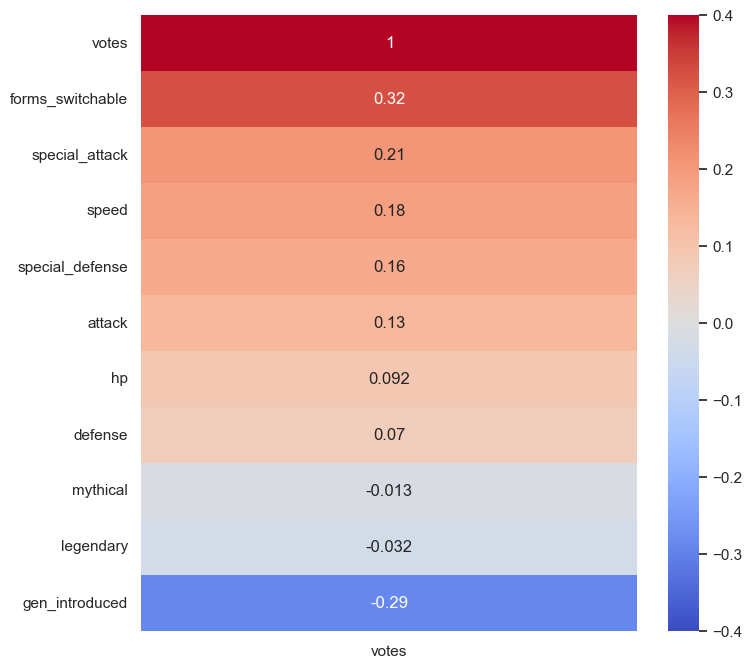

In [259]:
columns_to_drop = ['nat_dex', 'name', 'shape',
                   'is_default', 'primary_color'#,
                   #'type1', 'type2', 'egg_group1', 'egg_group2'
                   ]
heat = poke.drop(columns=columns_to_drop)
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(heat.corr()[['votes']].sort_values(by='votes', ascending=False),
            annot=True, cmap='coolwarm', vmax=.4, vmin=-.4)

In [260]:
# Since we are using a logorithmic scale, 0 does not appear, so we are changing the votes that are equal to 0 to .4
# This should not skew our data by much, and I would like to preserve the zero votes
poke_log = poke
poke_log = poke_log.astype({'votes': float})
poke_log.loc[poke_log['votes'] == 0, 'votes'] = .4
poke_log['votes'].min()

0.4

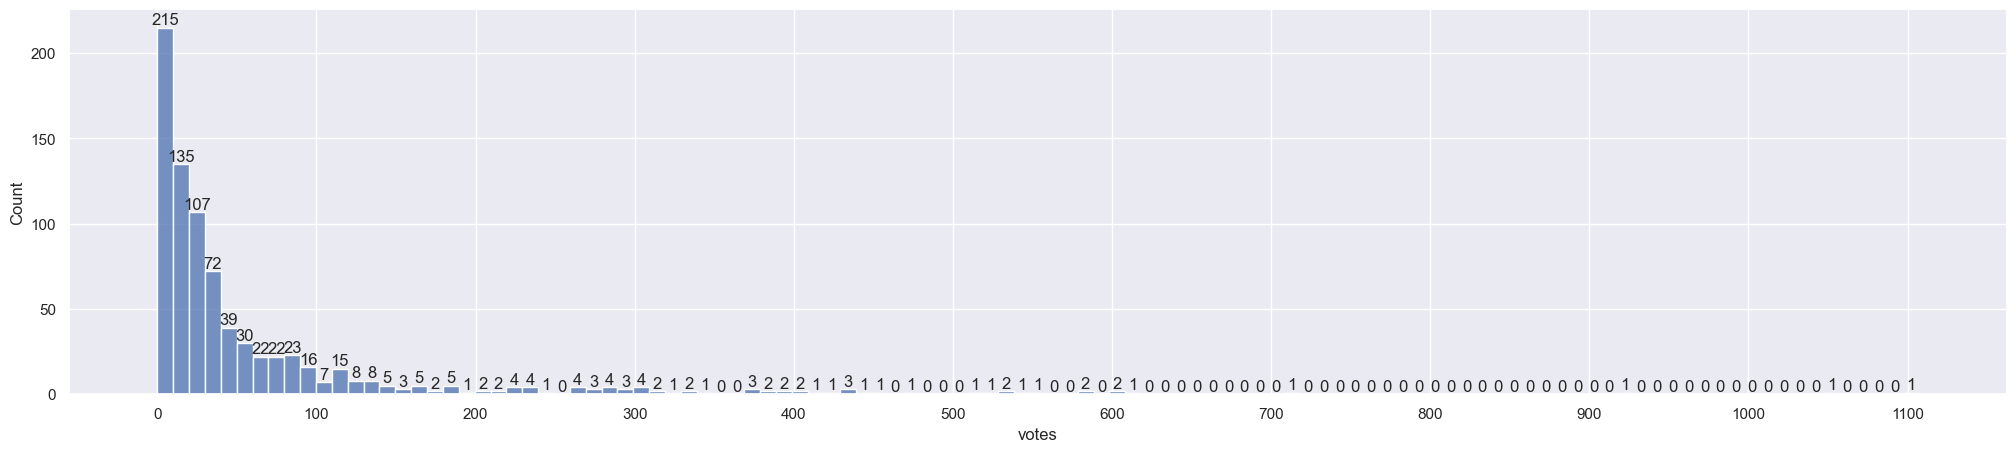

In [261]:
# Using a histogram to show the spread of votes
sns.set(style='darkgrid', rc={'figure.figsize':(25, 5)})

hist_votes = sns.histplot(data=poke, x='votes', binwidth=10)

hist_votes.bar_label(hist_votes.containers[0])
hist_votes.set_xticks(np.arange(0,1101,100))
plt.show(hist_votes)

As we can see from the histogram, the outliers skew our data. We may benefit from breaking our data down into small groups

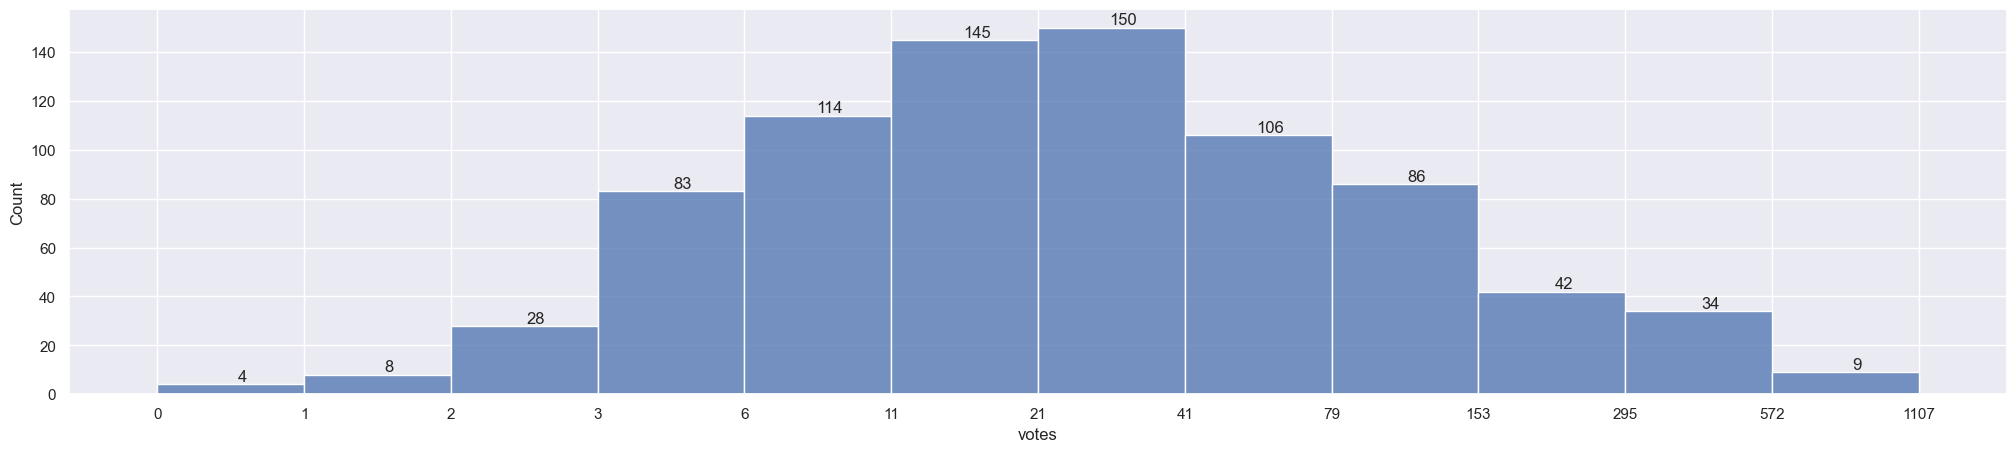

In [262]:
sns.set(style='darkgrid', rc={'figure.figsize':(25, 5)})

hist_log_votes = sns.histplot(data=poke_log, x='votes', bins=12, log_scale=True)

# This will figure out our bin edges since we are doing a logorithmic scale
min_val = poke_log['votes'].min()
max_val = poke_log['votes'].max()
# We have to do 13 divisions because of the number of bin edges is 1 more than the number of bins
bin_edges = np.logspace(np.log10(min_val), np.log10(max_val), 13)
bin_edges = bin_edges.tolist()

# This will set the tick marks to line up with our bins and so the labels reflect the vote range.
# Example is the 4th bin has the total number of pokemon that recived 3, 4, or 5 votes.
ticks_label = [round(round(f,1)) for f in bin_edges]
hist_log_votes.set_xticks(bin_edges)
hist_log_votes.set_xticklabels(ticks_label)

hist_log_votes.bar_label(hist_log_votes.containers[0])
plt.show(hist_log_votes)

In [263]:
def vote_count(dataframe, vote_lookup):
    # Filter rows based on the specified vote count
    filtered_data = dataframe[dataframe['votes'] == vote_lookup]
    
    # Get the number of rows with the specified vote count and return it
    return len(filtered_data)



def filter_df(dataframe, column_name, value, greater=True):
    """
    Filter a dataframe to give back all values that are greater than or equal to in a specific column.
    If greater=False than it gives all values that are lesser than or equal to in the specific column.
    """
    if greater == True:
        filter_dataframe = dataframe[dataframe[column_name] >= value]
    else:
        filter_dataframe = dataframe[dataframe[column_name] <= value]
    
    filter_dataframe.reset_index(drop=True, inplace=True)
    
    return filter_dataframe



def column_mean(dataframe, column_names):
    """
    Pass thru dataframe and column names to then figure the mean of the votes by that column name and append it to the end of said column
    """
    # Creating a dataframe to do our mean calculations on
    for column_name in column_names:
        # 'is_default' is a boolian that is always true so that will be good to use for a count
        mean_df = dataframe.groupby(column_name).agg({'votes': 'sum', 'is_default': 'count'}).reset_index()

        mean_df[column_name + '_mean'] = mean_df['votes'] / mean_df['is_default']
        # Merging a new column that will have the mean calculated if there is not one there.
        if column_name + '_mean' not in dataframe.columns:
            dataframe = pd.merge(dataframe, mean_df[[column_name, column_name + '_mean']], on=column_name, how='right')
        
    # Resorting dataframe by nat_dex and reseting index
    dataframe = dataframe.sort_values(by='nat_dex', ascending=True).reset_index(drop=True)
    return dataframe



def sort_df(dataframe, column_name, ascending=False):
    """"
    Sort function to sort df by a column 
    """
    sorted_df = dataframe.sort_values(by=column_name, ascending=ascending).reset_index(drop=True)
    return sorted_df

In [277]:
# Making some dataframes with pokemon that recived 100 votes or more, and one that has 9 or less
over = 100
under =99
poke_over = filter_df(poke, 'votes', over)
poke_under = filter_df(poke, 'votes', under, greater=False)

print(f'The number of pokemon with {over} or more votes is {len(poke_over)}. This is approximately {round((len(poke_over) / len(poke)) * 100, 1)}% of the sample size.')
print(f'The number of pokemon with {under} or lower votes is {len(poke_under)} This is approximately {round(((len(poke_under)/len(poke))*100),1)}% of the sample size.')

The number of pokemon with 100 or more votes is 128. This is approximately 15.8% of the sample size.
The number of pokemon with 99 or lower votes is 681 This is approximately 84.2% of the sample size.


In [265]:
# Adding columns that have the mean value of 'primary_color', 'shape', 'gen_introduced', using the function I made earlier
columns_to_mean = ['primary_color', 'shape', 'gen_introduced']
poke = column_mean(poke, columns_to_mean)
poke_over = column_mean(poke_over, columns_to_mean)
poke_under = column_mean(poke_under, columns_to_mean)

In [266]:
def df_box(dataframe):
    # Setting our style and figsize
    sns.set(style='darkgrid', rc={'figure.figsize':(20, 20)})

    # Making a subplot
    fig, axes = plt.subplots(nrows=3, ncols=1)
    # This box plot will show the distribution of primary_color of the pokemon
    color_box = sns.boxplot(x='votes', y='primary_color',
                    data=sort_df(dataframe, 'primary_color_mean'),
                    showmeans=True, meanprops={
                                            'marker':'o',
                                            'markerfacecolor':'white',
                                            'markeredgecolor':'black',
                                            'markersize':'10'
                                            },
                    color='b', ax=axes[0])
    color_box.set_ylabel('color')

    # This box plot will show the ditribution of shape of the pokemon
    shape_box = sns.boxplot(x='votes', y='shape',
                    data=sort_df(dataframe, 'shape_mean'),
                    showmeans=True, meanprops={
                                            'marker':'o',
                                            'markerfacecolor':'white',
                                            'markeredgecolor':'black',
                                            'markersize':'10'
                                            },
                    color='g', ax=axes[1])
    shape_box.set_ylabel('shape')

    # This box plot with show the distribution of when the pokemon was introduced based on generation
    gen_box = sns.boxplot(x='votes', y='gen_introduced', orient= 'h',
                    data=dataframe,
                    showmeans=True, meanprops={
                                            'marker':'o',
                                            'markerfacecolor':'white',
                                            'markeredgecolor':'black',
                                            'markersize':'10'
                                            },
                    color='r', ax=axes[2])
    gen_box.set_ylabel('generation')

    plt.tight_layout()
    plt.show()

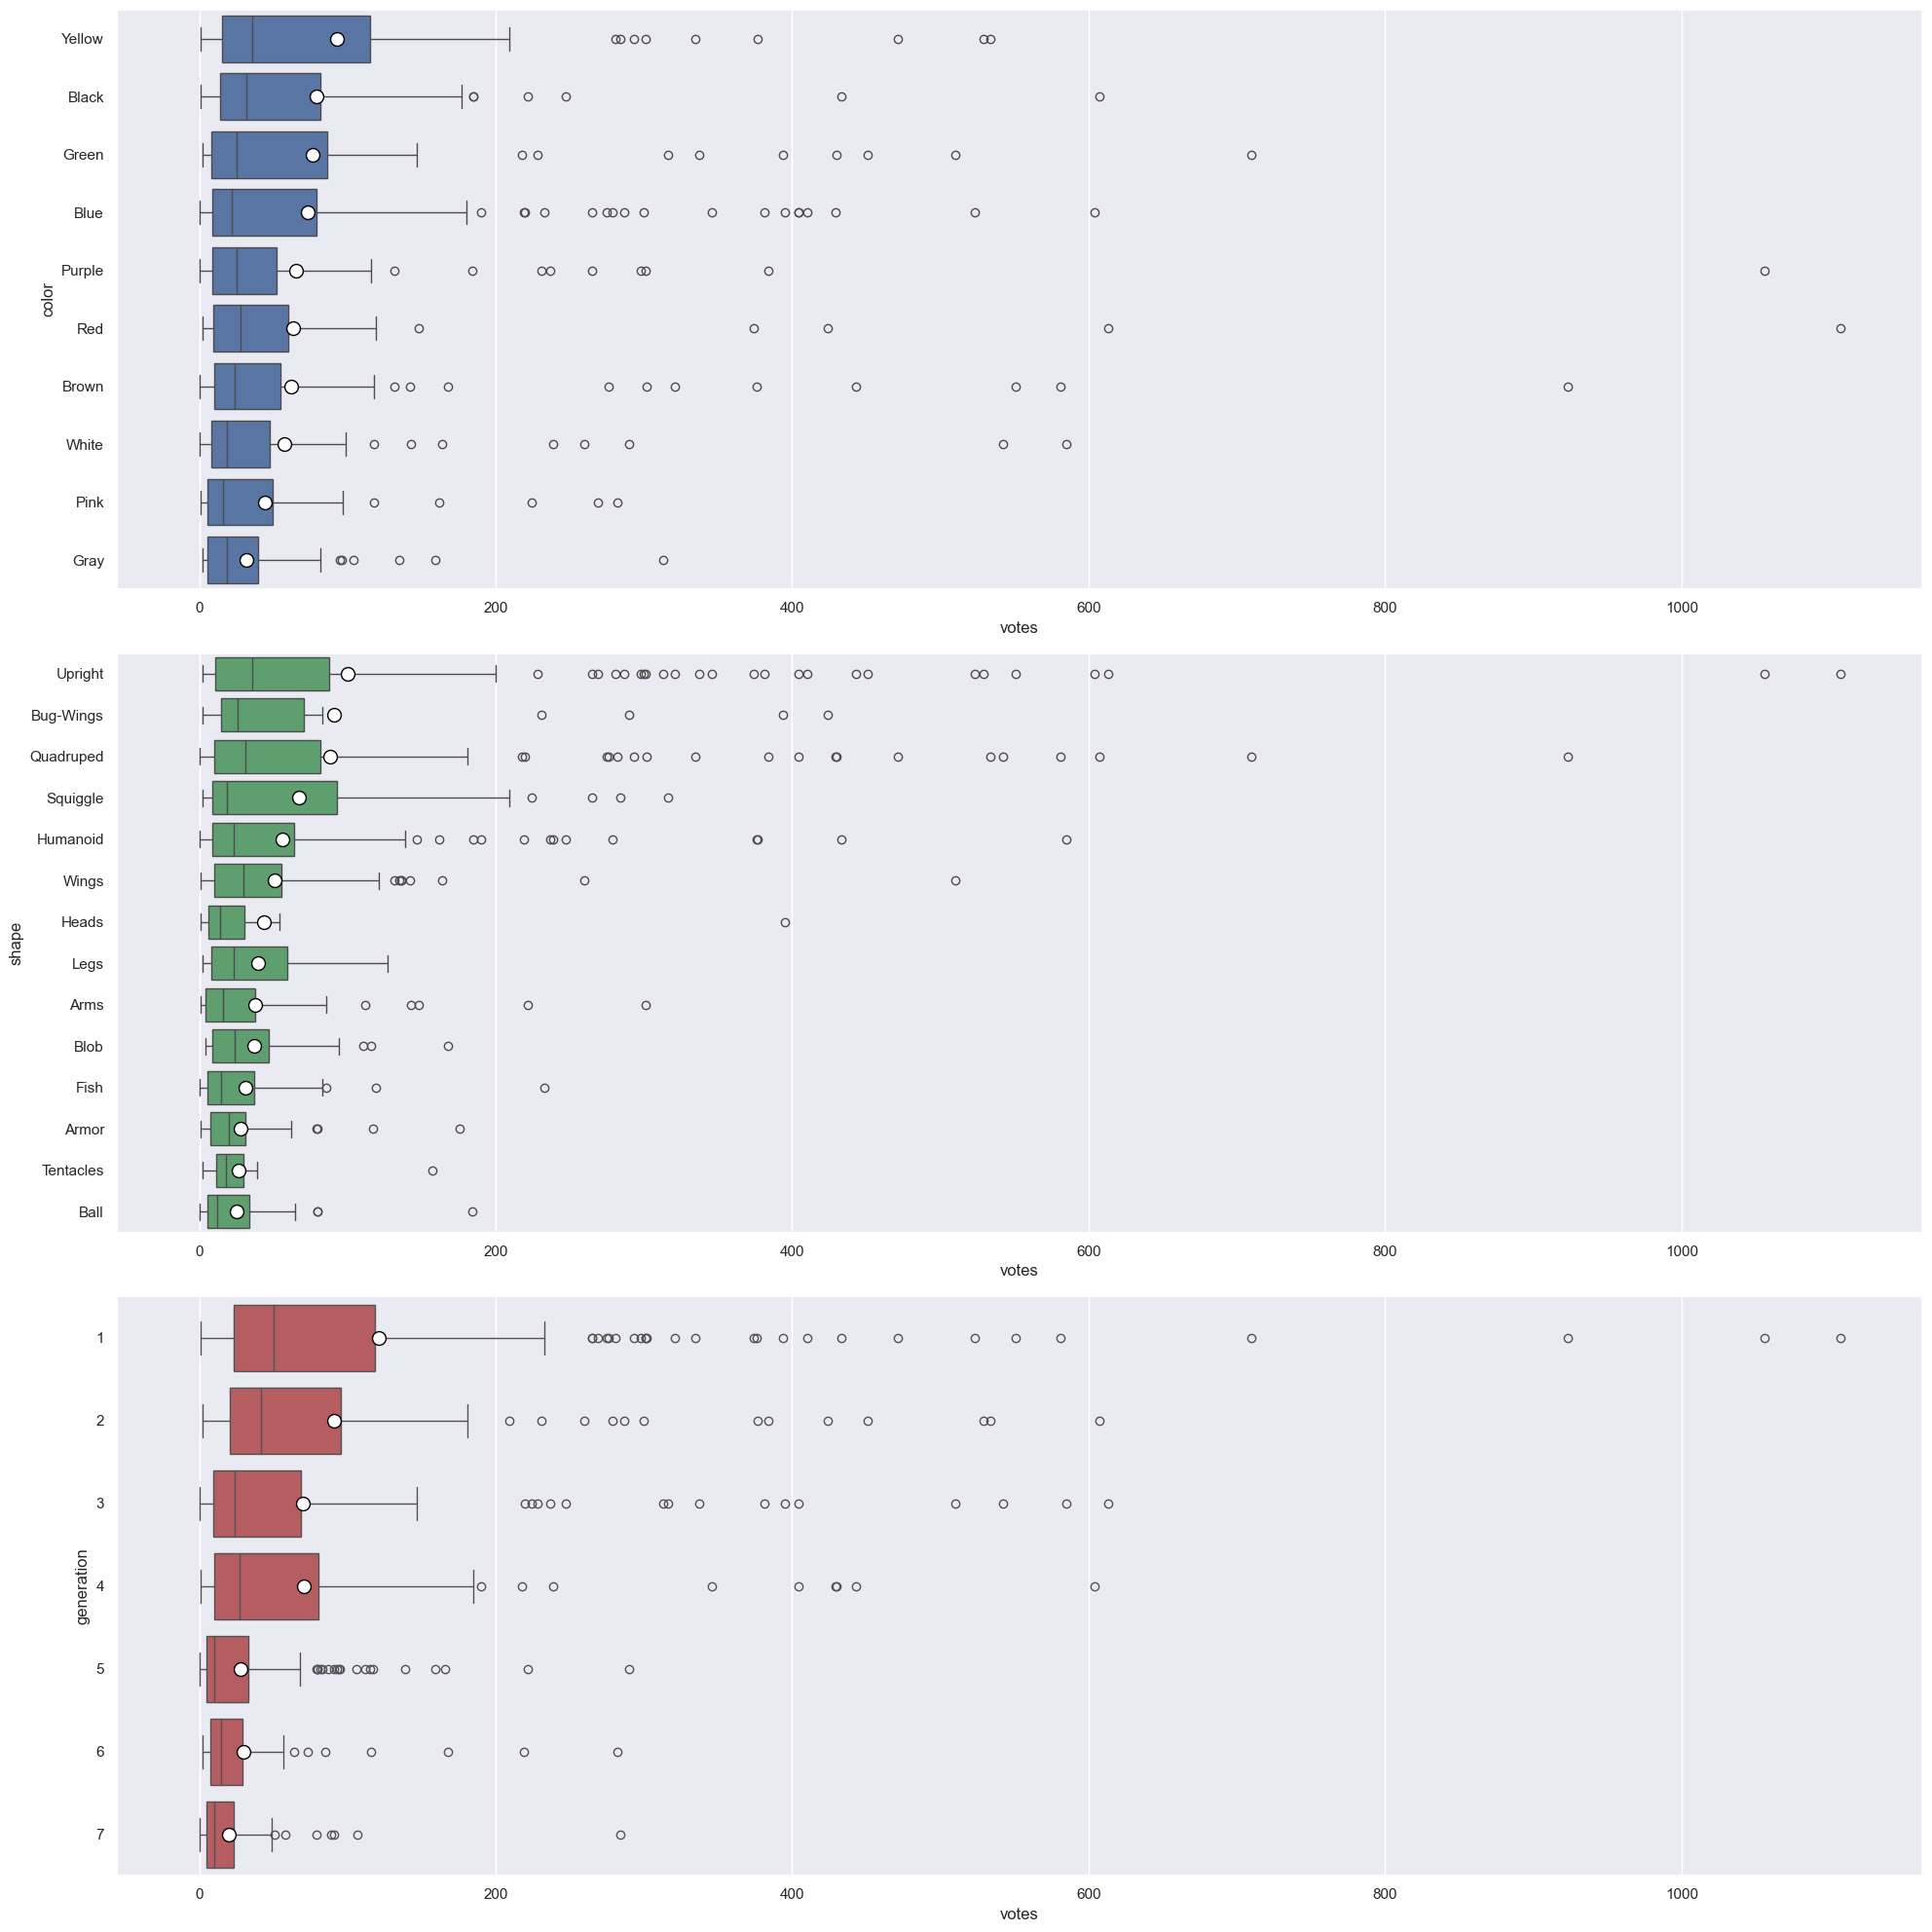

In [267]:
df_box(poke)

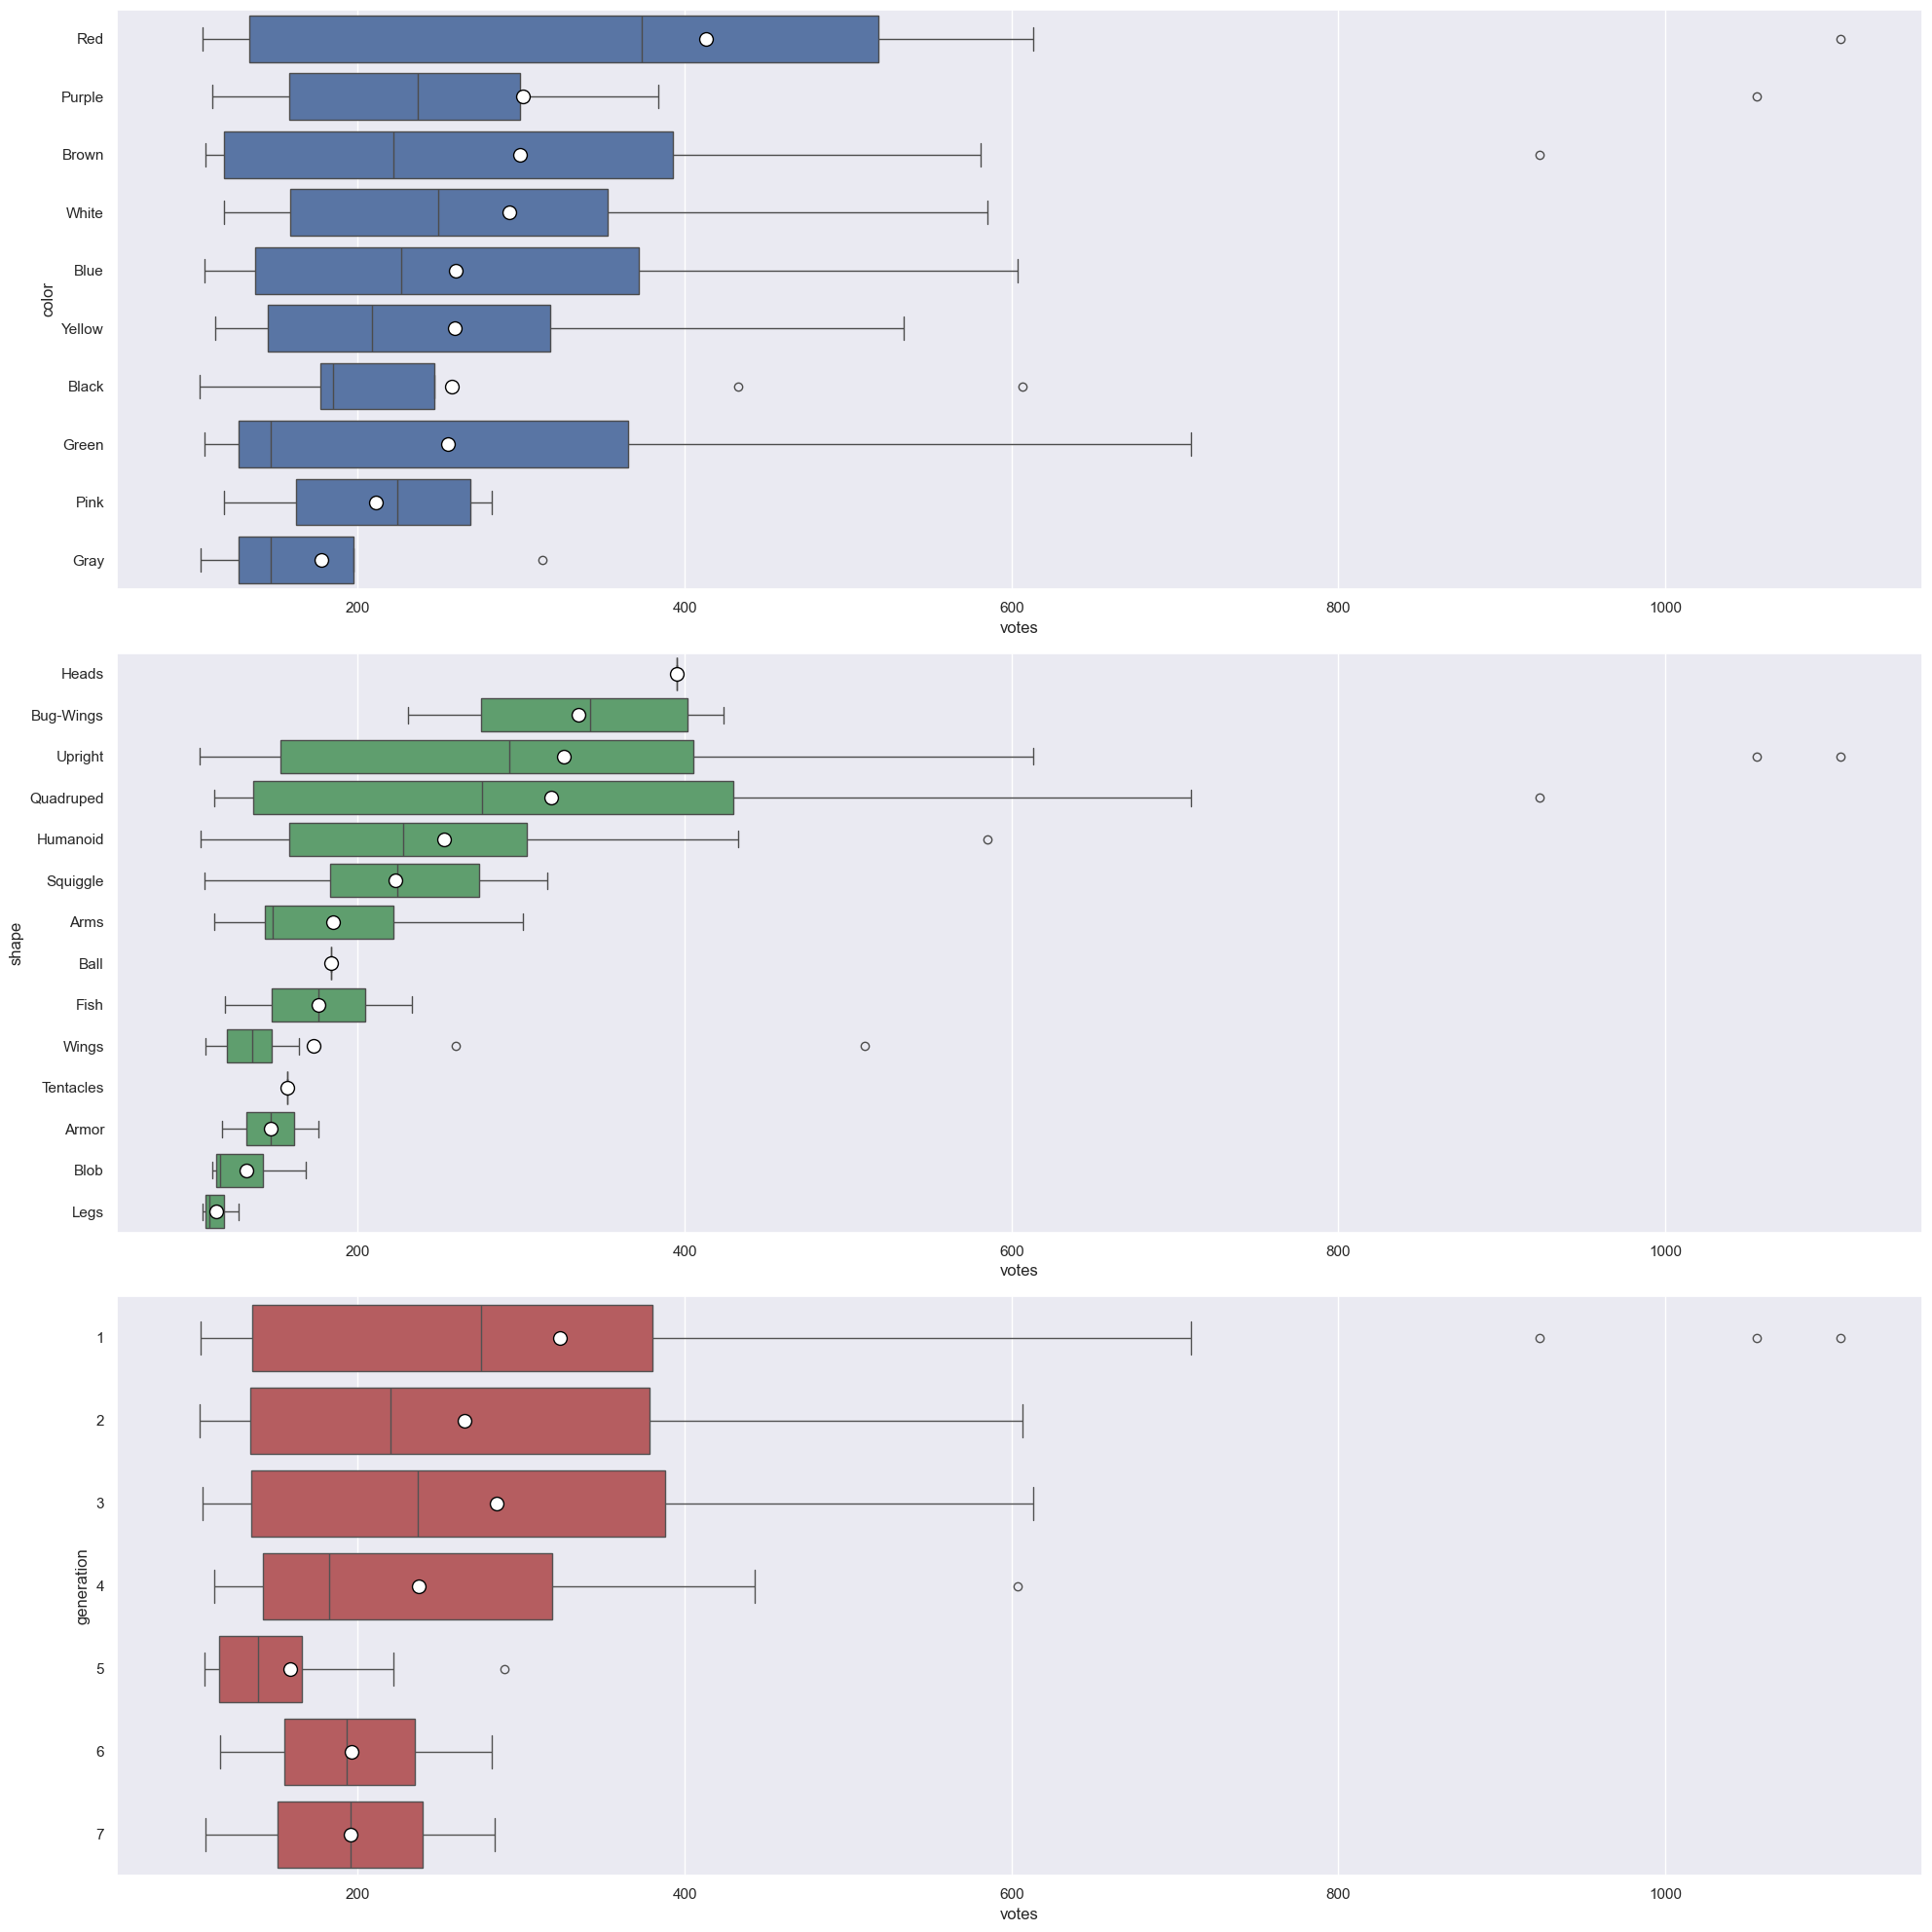

In [268]:
df_box(poke_over)

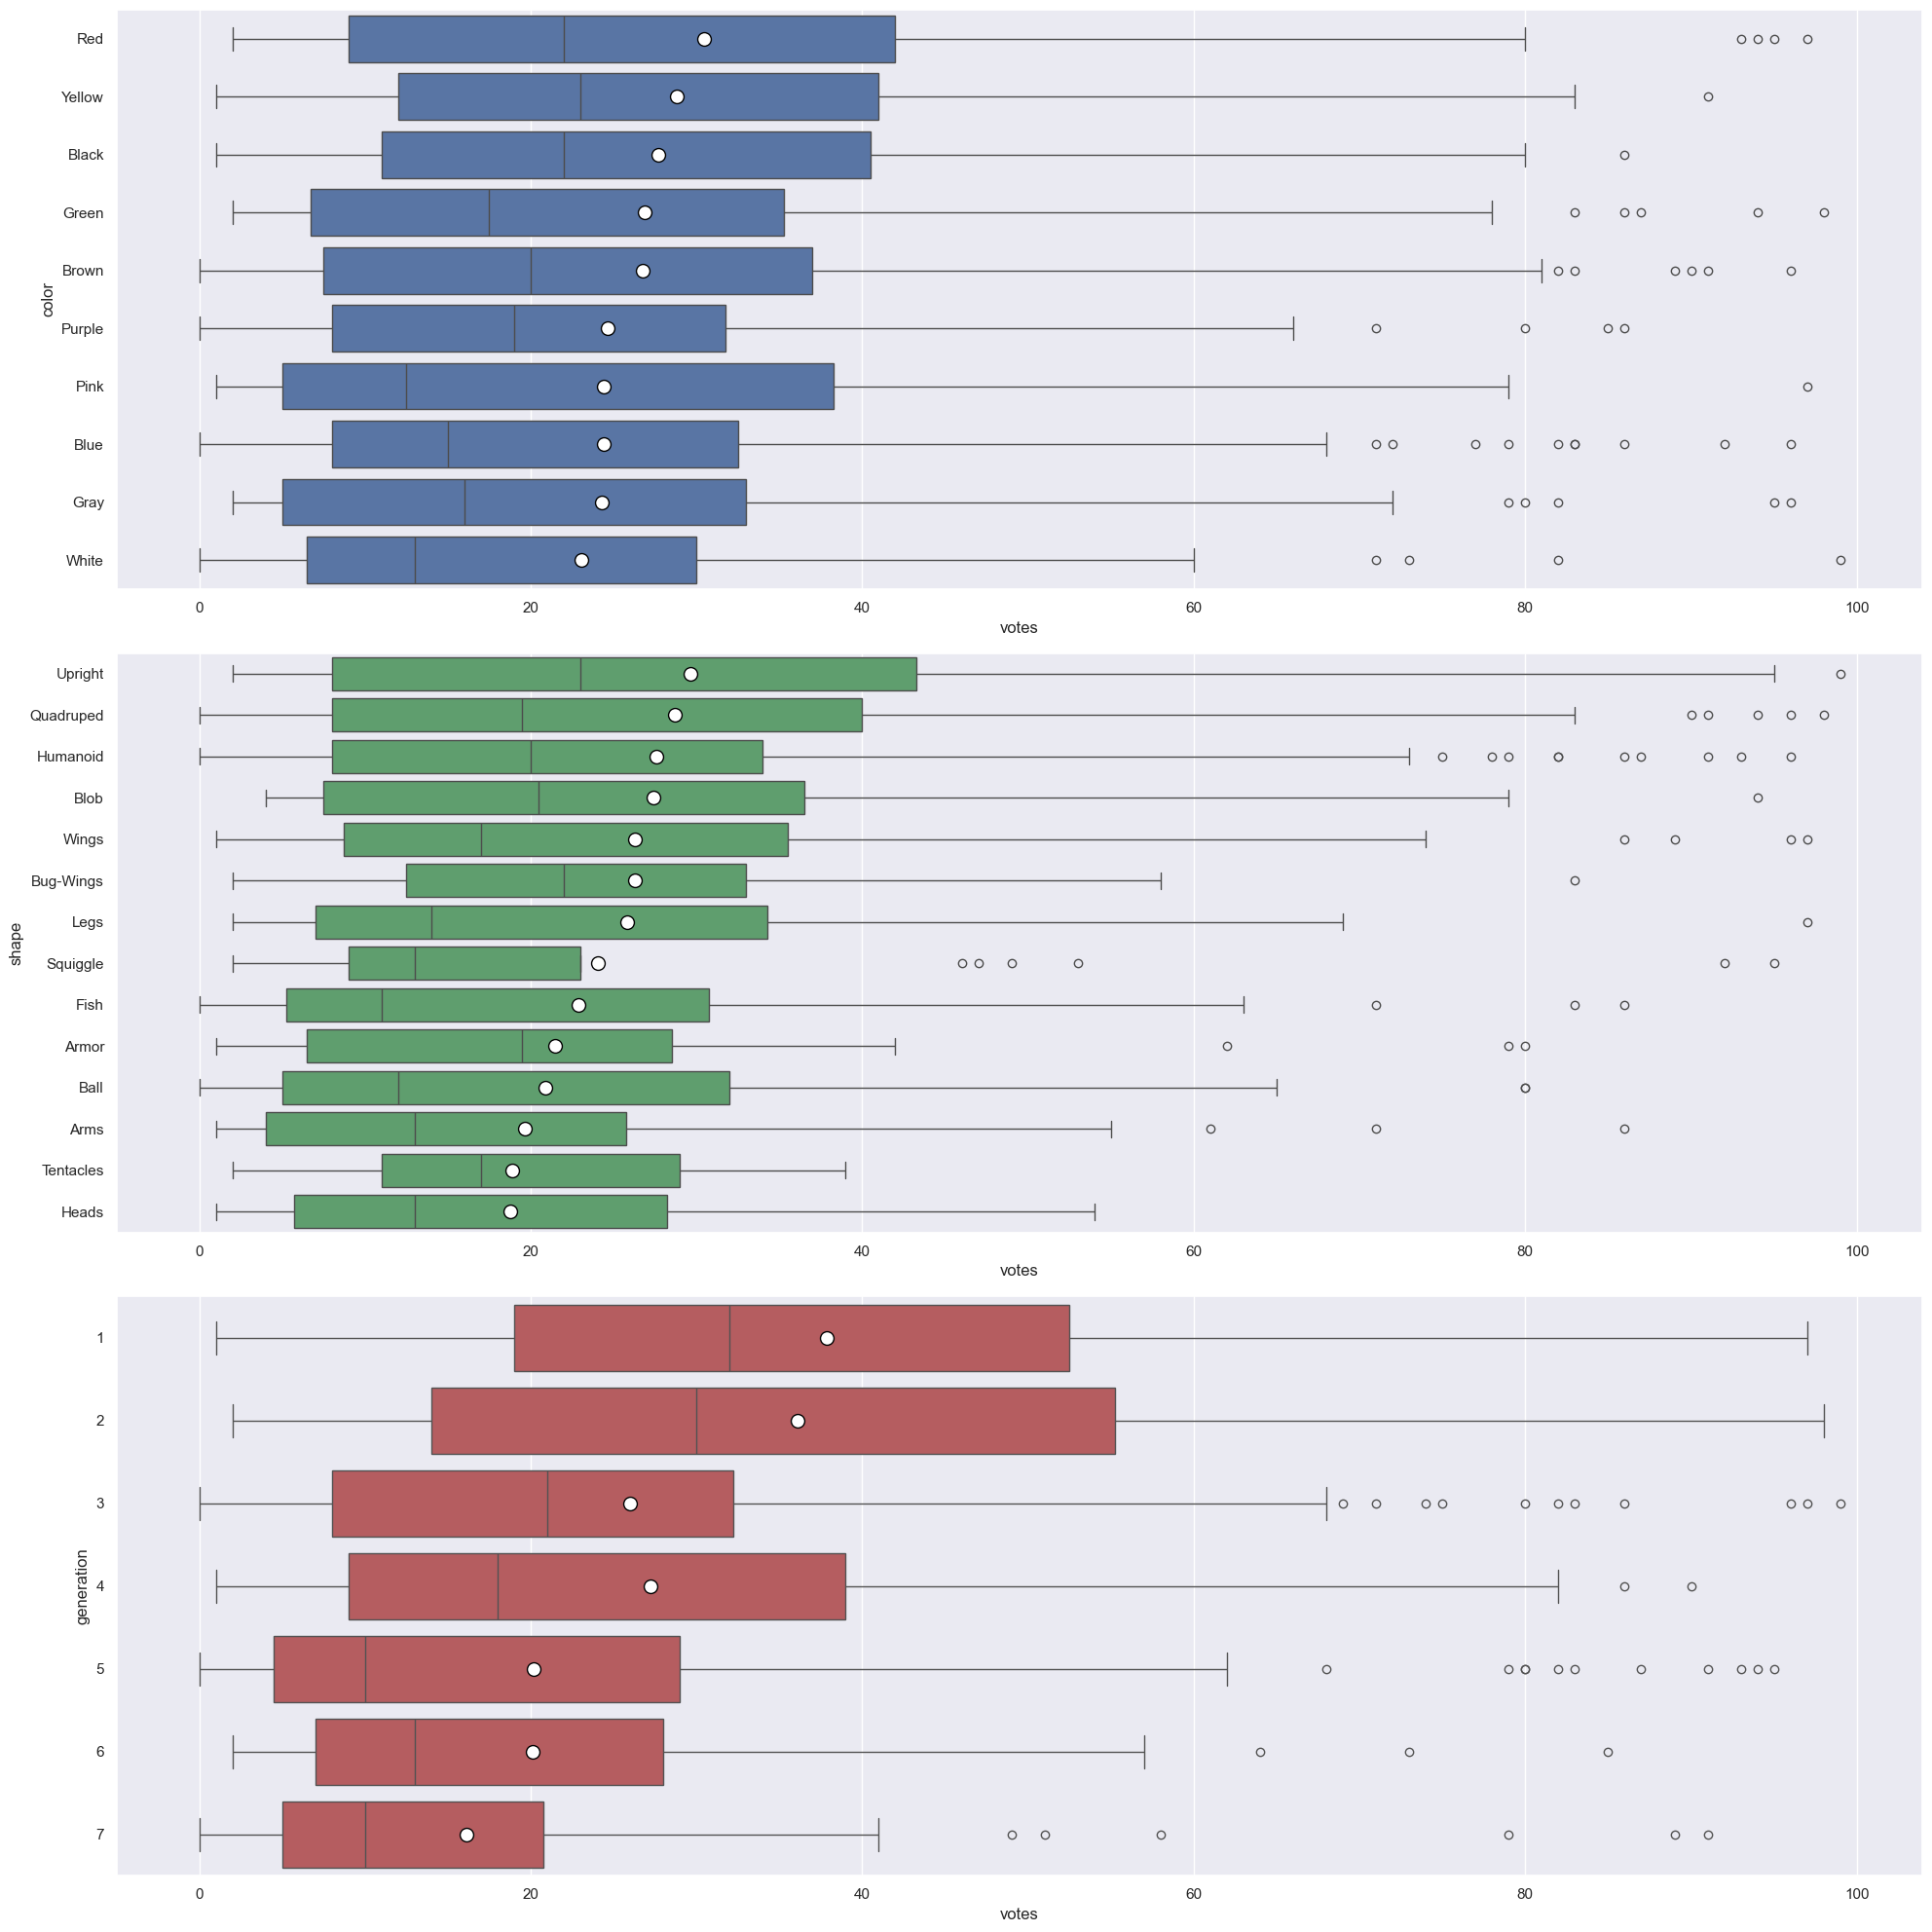

In [269]:
df_box(poke_under)